In [20]:
# Install required packages
!pip install requests pandas numpy matplotlib folium scipy -q

import requests
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import folium
from folium.plugins import MarkerCluster
from scipy.spatial import Voronoi
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries loaded!")

✅ All libraries loaded!


In [21]:
# OpenRouteService API Key (Free: 2000 requests/day)
# Get yours at: https://openrouteservice.org/dev/#/signup
# ORS_API_KEY = "5b3ce3597851110001cf6248e0c3e3c3b5b24a8f9d8c7b6a5d4e3f2a1b0c9d8e"  # Replace with your key
ORS_API_KEY = "eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjhjMDgzMjgzMmVjZDRhYmU4ZGE3ZTA1ZGE0OWZlYmY3IiwiaCI6Im11cm11cjY0In0="

---
## 1️⃣ K-Electric Centers Data

Loading all 49 CFC (Customer Facilitation Centers) and CEC (Customer Experience Centers) locations.

In [22]:
# K-Electric Centers Data (49 centers: 22 CFCs + 27 CECs)
centers_data = {
    'Center_Name': [
        # CFCs (22)
        'CFC Manghopir', 'CFC Macher Colony', 'CFC Lines Area', 'CFC Lalabad',
        'CFC Baldia', 'CFC North Karachi', 'CFC Surjani', 'CFC Orangi',
        'CFC SITE', 'CFC Liaquatabad', 'CFC North Nazimabad', 'CFC Gulshan',
        'CFC Korangi', 'CFC Landhi', 'CFC Malir', 'CFC Shah Faisal',
        'CFC Clifton', 'CFC Defence', 'CFC Saddar', 'CFC Garden',
        'CFC Nazimabad', 'CFC Federal B Area',
        # CECs (27)
        'CEC Hub', 'CEC Gadap', 'CEC Bin Qasim', 'CEC Pipri',
        'CEC Gharo', 'CEC Dhabeji', 'CEC Nooriabad', 'CEC Kotri',
        'CEC Thatta', 'CEC Sujawal', 'CEC Badin', 'CEC Matli',
        'CEC Tando Adam', 'CEC Hyderabad', 'CEC Jamshoro', 'CEC Sehwan',
        'CEC Dadu', 'CEC Larkana', 'CEC Shikarpur', 'CEC Sukkur',
        'CEC Khairpur', 'CEC Ghotki', 'CEC Jacobabad', 'CEC Kashmore',
        'CEC Kandhkot', 'CEC Usta Muhammad', 'CEC Quetta'
    ],
    'Center_Type': (
        ['CFC'] * 22 + ['CEC'] * 27
    ),
    'Division': [
        # CFCs
        'New Karachi', 'Kemari/Lyari', 'Saddar', 'Landhi',
        'Baldia', 'North Karachi', 'Surjani', 'Orangi',
        'SITE', 'Liaquatabad', 'North Nazimabad', 'Gulshan',
        'Korangi', 'Landhi', 'Malir', 'Shah Faisal',
        'Clifton', 'Defence', 'Saddar', 'Garden',
        'Nazimabad', 'Federal B Area',
        # CECs
        'Hub', 'Gadap', 'Bin Qasim', 'Pipri',
        'Gharo', 'Dhabeji', 'Nooriabad', 'Kotri',
        'Thatta', 'Sujawal', 'Badin', 'Matli',
        'Tando Adam', 'Hyderabad', 'Jamshoro', 'Sehwan',
        'Dadu', 'Larkana', 'Shikarpur', 'Sukkur',
        'Khairpur', 'Ghotki', 'Jacobabad', 'Kashmore',
        'Kandhkot', 'Usta Muhammad', 'Quetta'
    ],
    'Latitude': [
        # CFCs
        24.9815, 24.862, 24.8645, 24.855,
        24.886, 24.972, 25.01, 24.955,
        24.895, 24.904, 24.942, 24.926,
        24.831, 24.855, 24.893, 24.867,
        24.815, 24.795, 24.861, 24.873,
        24.912, 24.938,
        # CECs
        25.045, 25.12, 24.795, 24.865,
        24.745, 24.815, 25.295, 25.365,
        24.745, 24.565, 24.655, 25.045,
        25.765, 25.395, 25.435, 26.425,
        26.735, 27.555, 27.955, 27.705,
        27.535, 28.135, 28.285, 28.435,
        28.245, 28.005, 25.805
    ],
    'Longitude': [
        # CFCs
        67.042, 66.985, 67.0395, 67.185,
        66.985, 67.056, 67.055, 67.012,
        67.015, 67.037, 67.062, 67.078,
        67.132, 67.185, 67.205, 67.142,
        67.028, 67.048, 67.0101, 67.032,
        67.042, 67.067,
        # CECs
        66.905, 67.345, 67.312, 67.155,
        67.585, 67.495, 67.895, 68.305,
        67.925, 68.015, 68.845, 68.655,
        68.665, 68.365, 67.805, 67.855,
        67.775, 68.205, 68.645, 68.855,
        68.765, 69.315, 68.435, 69.575,
        69.325, 68.045, 66.605
    ]
}

centers_df = pd.DataFrame(centers_data)

# Save to CSV
centers_df.to_csv('/kaggle/working/centers_clean.csv', index=False)
print(f"✅ Saved centers_clean.csv")

# Display summary
print(f"\n📊 Centers Summary:")
print(f"   Total: {len(centers_df)}")
print(f"   CFCs: {len(centers_df[centers_df['Center_Type'] == 'CFC'])}")
print(f"   CECs: {len(centers_df[centers_df['Center_Type'] == 'CEC'])}")

centers_df.head(10)

✅ Saved centers_clean.csv

📊 Centers Summary:
   Total: 49
   CFCs: 22
   CECs: 27


Center_Name Center_Type       Division  Latitude  Longitude
0      CFC Manghopir         CFC    New Karachi   24.9815    67.0420
1  CFC Macher Colony         CFC   Kemari/Lyari   24.8620    66.9850
2     CFC Lines Area         CFC         Saddar   24.8645    67.0395
3        CFC Lalabad         CFC         Landhi   24.8550    67.1850
4         CFC Baldia         CFC         Baldia   24.8860    66.9850
5  CFC North Karachi         CFC  North Karachi   24.9720    67.0560
6        CFC Surjani         CFC        Surjani   25.0100    67.0550
7         CFC Orangi         CFC         Orangi   24.9550    67.0120
8           CFC SITE         CFC           SITE   24.8950    67.0150
9    CFC Liaquatabad         CFC    Liaquatabad   24.9040    67.0370

---
## 2️⃣ Sample Fault Locations

Creating 30 sample fault locations across different areas of Karachi for testing.

In [23]:
# Create Sample Fault Locations (30 locations across Karachi)
sample_faults = pd.DataFrame({
    'Fault_ID': range(1, 31),
    'Location_Name': [
        # DHA and Clifton Area
        'DHA Phase 6 - Khayaban-e-Jami', 'DHA Phase 4 - 26th Street',
        'Clifton Block 5 - Sea View', 'DHA Phase 8 - Hilal Road',
        # Gulshan and Nazimabad
        'Gulshan-e-Iqbal Block 10', 'Gulshan-e-Iqbal Block 14',
        'Nazimabad No. 4', 'North Nazimabad Block H',
        # Korangi and Landhi Industrial
        'Korangi Industrial Area - Sector 23', 'Landhi Industrial Zone - Qasba Colony',
        'Korangi Crossing',
        # SITE and North Karachi Industrial
        'SITE Area - Manghopir Road', 'North Karachi Industrial Area - Sector 11',
        'Orangi Town - Sector 11',
        # Central Karachi
        'Saddar - Empress Market', 'Liaquatabad No. 10',
        'Federal B Area - Block 18', 'Gulberg - FB Area',
        # Malir and Outskirts
        'Malir Cantt - Check Post 4', 'Malir - Kala Board',
        'Shah Faisal Colony - Block 5', 'Quaidabad - Near Liaquatabad',
        # Port and Industrial South
        'Port Qasim Authority', 'Bin Qasim Industrial Zone',
        # Buffer Zone and Garden
        'Buffer Zone - North Karachi', 'Garden East - Kashmir Road',
        # New Developments
        'Bahria Town Karachi - Main Gate', 'Scheme 33 - Safari Club',
        'Super Highway - Toll Plaza', 'Lyari - Jackson Road'
    ],
    'Latitude': [
        24.8070, 24.8130, 24.8020, 24.7650,
        24.9220, 24.9180, 24.9120, 24.9450,
        24.8360, 24.8710, 24.8540,
        24.8950, 24.9670, 24.9430,
        24.8607, 24.8890, 24.9380, 24.9210,
        24.8930, 24.8830, 24.8670, 24.9020,
        24.7850, 24.7920,
        24.9590, 24.8730,
        24.9380, 24.9620, 25.0120, 24.8560
    ],
    'Longitude': [
        67.0650, 67.0340, 67.0280, 67.0480,
        67.0780, 67.1050, 67.0420, 67.0620,
        67.1320, 67.1670, 67.1050,
        67.0150, 67.0760, 67.0120,
        67.0101, 67.0370, 67.0670, 67.0590,
        67.2050, 67.1870, 67.1420, 67.0870,
        67.3520, 67.3120,
        67.0520, 67.0320,
        67.3180, 67.2350, 67.1250, 67.0180
    ],
    'Area_Type': [
        'Residential', 'Residential', 'Residential', 'Residential',
        'Residential', 'Residential', 'Residential', 'Residential',
        'Industrial', 'Industrial', 'Commercial',
        'Industrial', 'Industrial', 'Mixed',
        'Commercial', 'Mixed', 'Residential', 'Residential',
        'Residential', 'Mixed', 'Residential', 'Residential',
        'Industrial', 'Industrial',
        'Industrial', 'Commercial',
        'Residential', 'Residential', 'Highway', 'Residential'
    ]
})

# Add random time periods for traffic simulation
np.random.seed(42)
times = ['morning_rush', 'midday', 'evening_rush', 'night']
sample_faults['Time_Period'] = np.random.choice(times, len(sample_faults))

# Save to CSV
sample_faults.to_csv('sample_fault_locations.csv', index=False)
print(f"✅ Saved sample_fault_locations.csv with {len(sample_faults)} locations")

sample_faults.head(10)

✅ Saved sample_fault_locations.csv with 30 locations


Fault_ID                          Location_Name  Latitude  Longitude  \
0         1          DHA Phase 6 - Khayaban-e-Jami    24.807     67.065   
1         2              DHA Phase 4 - 26th Street    24.813     67.034   
2         3             Clifton Block 5 - Sea View    24.802     67.028   
3         4               DHA Phase 8 - Hilal Road    24.765     67.048   
4         5               Gulshan-e-Iqbal Block 10    24.922     67.078   
5         6               Gulshan-e-Iqbal Block 14    24.918     67.105   
6         7                        Nazimabad No. 4    24.912     67.042   
7         8                North Nazimabad Block H    24.945     67.062   
8         9    Korangi Industrial Area - Sector 23    24.836     67.132   
9        10  Landhi Industrial Zone - Qasba Colony    24.871     67.167   

     Area_Type   Time_Period  
0  Residential  evening_rush  
1  Residential         night  
2  Residential  morning_rush  
3  Residential  evening_rush  
4  Residential  evening_rush  
5  Residential         night  
6  Residential  morning_rush  
7  Residential  morning_rush  
8   Industrial  evening_rush  
9   Industrial        midday

---
## 3️⃣ Core Functions

Defining functions for distance calculation, travel time estimation, and traffic multipliers.

In [24]:
# Haversine Distance Function
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    Returns distance in kilometers
    """
    R = 6371  # Earth's radius in km
    
    lat1_rad = math.radians(lat1)
    lat2_rad = math.radians(lat2)
    delta_lat = math.radians(lat2 - lat1)
    delta_lon = math.radians(lon2 - lon1)
    
    a = math.sin(delta_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

# OpenRouteService API Function
def get_travel_time_ors(origin_lat, origin_lng, dest_lat, dest_lng, api_key=ORS_API_KEY):
    """
    Get travel time using OpenRouteService Directions API
    Returns: travel_time_minutes, distance_km
    """
    url = "https://api.openrouteservice.org/v2/directions/driving-car"
    
    headers = {
        'Authorization': api_key,
        'Content-Type': 'application/json'
    }
    
    body = {
        "coordinates": [[origin_lng, origin_lat], [dest_lng, dest_lat]],
        "instructions": False
    }
    
    try:
        response = requests.post(url, json=body, headers=headers)
        if response.status_code == 200:
            data = response.json()
            if 'routes' in data and len(data['routes']) > 0:
                route = data['routes'][0]['summary']
                duration_min = route['duration'] / 60
                distance_km = route['distance'] / 1000
                return duration_min, distance_km
    except Exception as e:
        pass  # Silently fail, will use Haversine fallback
    
    return None, None

# Traffic Multipliers (Research-based for Karachi)
def get_traffic_multiplier(time_period):
    """
    Research-based traffic multipliers for Karachi
    Based on traffic congestion studies
    """
    multipliers = {
        'morning_rush': 1.5,   # 7 AM - 10 AM
        'midday': 1.2,         # 10 AM - 4 PM
        'evening_rush': 1.6,   # 4 PM - 8 PM (worst)
        'night': 1.0           # 8 PM - 7 AM (free flow)
    }
    return multipliers.get(time_period, 1.3)

print("✅ Core functions defined:")
print("   - haversine_distance()")
print("   - get_travel_time_ors()")
print("   - get_traffic_multiplier()")

✅ Core functions defined:
   - haversine_distance()
   - get_travel_time_ors()
   - get_traffic_multiplier()


In [25]:
# Response Time Calculation Function
def calculate_fault_response_time(fault_row, centers_df, use_api=False, avg_speed_kmh=40):
    """
    Calculate response time for a fault location
    
    Formula: Total ETA = Travel Time (with traffic) + Fix Time
    
    Args:
        fault_row: Row from faults DataFrame
        centers_df: DataFrame with center locations
        use_api: Whether to use ORS API (slower but more accurate)
        avg_speed_kmh: Average speed for Haversine estimate
    
    Returns: Dictionary with response time details
    """
    fault_lat = fault_row['Latitude']
    fault_lng = fault_row['Longitude']
    time_period = fault_row['Time_Period']
    
    best_center = None
    best_distance = float('inf')
    best_base_time = None
    
    for _, center in centers_df.iterrows():
        center_lat = center['Latitude']
        center_lng = center['Longitude']
        
        if use_api:
            base_time, distance = get_travel_time_ors(
                center_lat, center_lng, fault_lat, fault_lng
            )
            if base_time is None:  # Fallback to Haversine
                distance = haversine_distance(center_lat, center_lng, fault_lat, fault_lng)
                base_time = (distance / avg_speed_kmh) * 60
        else:
            distance = haversine_distance(center_lat, center_lng, fault_lat, fault_lng)
            base_time = (distance / avg_speed_kmh) * 60
        
        if distance < best_distance:
            best_distance = distance
            best_base_time = base_time
            best_center = center
    
    # Apply traffic multiplier
    traffic_multiplier = get_traffic_multiplier(time_period)
    traffic_adjusted_time = best_base_time * traffic_multiplier
    
    # Add average fix time (90 minutes)
    avg_fix_time = 90
    total_eta = traffic_adjusted_time + avg_fix_time
    
    return {
        'nearest_center': best_center['Center_Name'],
        'center_type': best_center['Center_Type'],
        'distance_km': round(best_distance, 2),
        'base_travel_min': round(best_base_time, 1),
        'traffic_multiplier': traffic_multiplier,
        'adjusted_travel_min': round(traffic_adjusted_time, 1),
        'fix_time_min': avg_fix_time,
        'total_eta_min': round(total_eta, 1)
    }

print("✅ Response time function defined")

✅ Response time function defined


---
## 4️⃣ Calculate Response Times

Computing response times for all 30 fault locations.

In [26]:
# Calculate response times for all faults
print("⏳ Calculating response times...")

results = []
for idx, fault in sample_faults.iterrows():
    result = calculate_fault_response_time(fault, centers_df, use_api=False)
    result['fault_id'] = fault['Fault_ID']
    result['fault_location'] = fault['Location_Name']
    result['area_type'] = fault['Area_Type']
    result['time_period'] = fault['Time_Period']
    results.append(result)

# Create results DataFrame
response_times_df = pd.DataFrame(results)

# Reorder columns
cols = ['fault_id', 'fault_location', 'area_type', 'time_period', 
        'nearest_center', 'center_type', 'distance_km', 
        'base_travel_min', 'traffic_multiplier', 'adjusted_travel_min',
        'fix_time_min', 'total_eta_min']
response_times_df = response_times_df[cols]

# Save to CSV
response_times_df.to_csv('fault_response_times.csv', index=False)
print(f"✅ Saved fault_response_times.csv")

# Display summary statistics
print(f"\n" + "="*60)
print("📊 RESPONSE TIME SUMMARY")
print("="*60)
print(f"Total Faults Analyzed: {len(response_times_df)}")
print(f"\n📏 Distance to Nearest Center:")
print(f"   Min: {response_times_df['distance_km'].min():.2f} km")
print(f"   Max: {response_times_df['distance_km'].max():.2f} km")
print(f"   Avg: {response_times_df['distance_km'].mean():.2f} km")
print(f"\n🚗 Travel Time (with traffic):")
print(f"   Min: {response_times_df['adjusted_travel_min'].min():.1f} min")
print(f"   Max: {response_times_df['adjusted_travel_min'].max():.1f} min")
print(f"   Avg: {response_times_df['adjusted_travel_min'].mean():.1f} min")
print(f"\n⏱️ Total ETA (Travel + Fix):")
print(f"   Min: {response_times_df['total_eta_min'].min():.1f} min")
print(f"   Max: {response_times_df['total_eta_min'].max():.1f} min")
print(f"   Avg: {response_times_df['total_eta_min'].mean():.1f} min")
print("="*60)

response_times_df.head(15)

⏳ Calculating response times...
✅ Saved fault_response_times.csv

📊 RESPONSE TIME SUMMARY
Total Faults Analyzed: 30

📏 Distance to Nearest Center:
   Min: 0.00 km
   Max: 12.45 km
   Avg: 2.12 km

🚗 Travel Time (with traffic):
   Min: 0.0 min
   Max: 22.4 min
   Avg: 4.1 min

⏱️ Total ETA (Travel + Fix):
   Min: 90.0 min
   Max: 112.4 min
   Avg: 94.1 min


fault_id                             fault_location    area_type  \
0          1              DHA Phase 6 - Khayaban-e-Jami  Residential   
1          2                  DHA Phase 4 - 26th Street  Residential   
2          3                 Clifton Block 5 - Sea View  Residential   
3          4                   DHA Phase 8 - Hilal Road  Residential   
4          5                   Gulshan-e-Iqbal Block 10  Residential   
5          6                   Gulshan-e-Iqbal Block 14  Residential   
6          7                            Nazimabad No. 4  Residential   
7          8                    North Nazimabad Block H  Residential   
8          9        Korangi Industrial Area - Sector 23   Industrial   
9         10      Landhi Industrial Zone - Qasba Colony   Industrial   
10        11                           Korangi Crossing   Commercial   
11        12                 SITE Area - Manghopir Road   Industrial   
12        13  North Karachi Industrial Area - Sector 11   Industrial   
13        14                    Orangi Town - Sector 11        Mixed   
14        15                    Saddar - Empress Market   Commercial   

     time_period       nearest_center center_type  distance_km  \
0   evening_rush          CFC Defence         CFC         2.17   
1          night          CFC Clifton         CFC         0.65   
2   morning_rush          CFC Clifton         CFC         1.45   
3   evening_rush          CFC Defence         CFC         3.34   
4   evening_rush          CFC Gulshan         CFC         0.44   
5          night          CFC Gulshan         CFC         2.86   
6   morning_rush        CFC Nazimabad         CFC         0.00   
7   morning_rush  CFC North Nazimabad         CFC         0.33   
8   evening_rush          CFC Korangi         CFC         0.56   
9         midday            CEC Pipri         CEC         1.38   
10  evening_rush          CFC Korangi         CFC         3.74   
11  evening_rush             CFC SITE         CFC         0.00   
12  evening_rush    CFC North Karachi         CFC         2.09   
13  evening_rush           CFC Orangi         CFC         1.33   
14         night           CFC Saddar         CFC         0.03   

    base_travel_min  traffic_multiplier  adjusted_travel_min  fix_time_min  \
0               3.3                 1.6                  5.2            90   
1               1.0                 1.0                  1.0            90   
2               2.2                 1.5                  3.3            90   
3               5.0                 1.6                  8.0            90   
4               0.7                 1.6                  1.1            90   
5               4.3                 1.0                  4.3            90   
6               0.0                 1.5                  0.0            90   
7               0.5                 1.5                  0.8            90   
8               0.8                 1.6                  1.3            90   
9               2.1                 1.2                  2.5            90   
10              5.6                 1.6                  9.0            90   
11              0.0                 1.6                  0.0            90   
12              3.1                 1.6                  5.0            90   
13              2.0                 1.6                  3.2            90   
14              0.1                 1.0                  0.1            90   

    total_eta_min  
0            95.2  
1            91.0  
2            93.3  
3            98.0  
4            91.1  
5            94.3  
6            90.0  
7            90.8  
8            91.3  
9            92.5  
10           99.0  
11           90.0  
12           95.0  
13           93.2  
14           90.1

---
## 5️⃣ Interactive Coverage Map

Creating an interactive map showing all centers and fault locations.

In [27]:
# Create Interactive Coverage Map
def create_coverage_map(centers_df, faults_df):
    """
    Create interactive Folium map with centers and faults
    """
    # Center on Karachi
    center_lat = 24.87
    center_lng = 67.05
    
    m = folium.Map(
        location=[center_lat, center_lng],
        zoom_start=11,
        tiles='CartoDB positron'
    )
    
    # Add tile options
    folium.TileLayer('OpenStreetMap', name='Street Map').add_to(m)
    folium.TileLayer('CartoDB dark_matter', name='Dark Mode').add_to(m)
    
    # CFC Centers (Blue)
    cfc_group = folium.FeatureGroup(name='⚡ CFC Centers (22)')
    for _, row in centers_df[centers_df['Center_Type'] == 'CFC'].iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=10,
            color='#2196F3',
            fill=True,
            fillColor='#2196F3',
            fillOpacity=0.8,
            popup=f"<b>{row['Center_Name']}</b><br>Type: CFC<br>Area: {row['Division']}",
            tooltip=row['Center_Name']
        ).add_to(cfc_group)
    cfc_group.add_to(m)
    
    # CEC Centers (Orange)
    cec_group = folium.FeatureGroup(name='🔧 CEC Centers (27)')
    for _, row in centers_df[centers_df['Center_Type'] == 'CEC'].iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=8,
            color='#FF9800',
            fill=True,
            fillColor='#FF9800',
            fillOpacity=0.8,
            popup=f"<b>{row['Center_Name']}</b><br>Type: CEC<br>Area: {row['Division']}",
            tooltip=row['Center_Name']
        ).add_to(cec_group)
    cec_group.add_to(m)
    
    # Fault Locations (Color by area type)
    fault_group = folium.FeatureGroup(name='🚨 Fault Locations (30)')
    color_map = {
        'Residential': '#E91E63',
        'Industrial': '#9C27B0',
        'Commercial': '#4CAF50',
        'Mixed': '#FF5722',
        'Highway': '#795548'
    }
    
    for _, row in faults_df.iterrows():
        color = color_map.get(row['Area_Type'], '#F44336')
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=6,
            color=color,
            fill=True,
            fillColor=color,
            fillOpacity=0.6,
            popup=f"<b>Fault #{row['Fault_ID']}</b><br>{row['Location_Name']}<br>Area: {row['Area_Type']}<br>Time: {row['Time_Period']}",
            tooltip=f"Fault #{row['Fault_ID']}"
        ).add_to(fault_group)
    fault_group.add_to(m)
    
    # Legend
    legend_html = '''
    <div style="position: fixed; bottom: 50px; right: 50px; 
                border:2px solid grey; z-index:9999; background-color:white;
                padding: 10px; font-size: 14px; border-radius: 5px;">
    <b>K-Electric Coverage</b><br>
    <i style="background:#2196F3;border-radius:50%;width:12px;height:12px;display:inline-block;"></i> CFC (22)<br>
    <i style="background:#FF9800;border-radius:50%;width:12px;height:12px;display:inline-block;"></i> CEC (27)<br>
    <hr style="margin:5px 0;"><b>Faults:</b><br>
    <i style="background:#E91E63;border-radius:50%;width:10px;height:10px;display:inline-block;"></i> Residential<br>
    <i style="background:#9C27B0;border-radius:50%;width:10px;height:10px;display:inline-block;"></i> Industrial<br>
    <i style="background:#4CAF50;border-radius:50%;width:10px;height:10px;display:inline-block;"></i> Commercial
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    folium.LayerControl().add_to(m)
    return m

# Create and save map
coverage_map = create_coverage_map(centers_df, sample_faults)
coverage_map.save('ke_coverage_map.html')
print("✅ Saved ke_coverage_map.html")

coverage_map

✅ Saved ke_coverage_map.html


---
## 6️⃣ Voronoi Coverage Regions

Creating a map showing which center serves which geographic area.

In [28]:
# Create Voronoi Coverage Map
def create_voronoi_map(centers_df, faults_df):
    """
    Create map with Voronoi coverage regions
    """
    # Filter to Karachi centers only (for cleaner visualization)
    karachi_centers = centers_df[centers_df['Latitude'] < 25.2].copy()
    
    center_lat = karachi_centers['Latitude'].mean()
    center_lng = karachi_centers['Longitude'].mean()
    
    m = folium.Map(
        location=[center_lat, center_lng],
        zoom_start=11,
        tiles='CartoDB positron'
    )
    
    # Prepare Voronoi
    points = karachi_centers[['Latitude', 'Longitude']].values
    
    # Add boundary points
    lat_min, lat_max = points[:, 0].min() - 0.1, points[:, 0].max() + 0.1
    lng_min, lng_max = points[:, 1].min() - 0.1, points[:, 1].max() + 0.1
    
    boundary = np.array([
        [lat_min, lng_min], [lat_min, lng_max],
        [lat_max, lng_min], [lat_max, lng_max],
        [(lat_min+lat_max)/2, lng_min-0.15],
        [(lat_min+lat_max)/2, lng_max+0.15],
        [lat_min-0.15, (lng_min+lng_max)/2],
        [lat_max+0.15, (lng_min+lng_max)/2]
    ])
    
    all_points = np.vstack([points, boundary])
    
    try:
        vor = Voronoi(all_points)
        
        # Colors
        cfc_colors = ['#1976D2', '#1E88E5', '#2196F3', '#42A5F5', '#64B5F6',
                      '#0D47A1', '#1565C0', '#0277BD', '#0288D1', '#039BE5',
                      '#01579B', '#006064', '#00838F', '#0097A7', '#00ACC1',
                      '#00695C', '#00796B', '#00897B', '#009688', '#26A69A', '#004D40', '#00695C']
        cec_colors = ['#E65100', '#EF6C00', '#F57C00', '#FB8C00', '#FF9800',
                      '#FFA726', '#FFB74D', '#FFCC80', '#BF360C', '#D84315',
                      '#E64A19', '#F4511E', '#FF5722', '#FF7043', '#FF8A65',
                      '#FF6D00', '#FF9100', '#FFA000', '#FFB300', '#FFC107']
        
        voronoi_group = folium.FeatureGroup(name='📍 Coverage Regions')
        
        for i, (_, center) in enumerate(karachi_centers.iterrows()):
            region_idx = vor.point_region[i]
            region = vor.regions[region_idx]
            
            if -1 not in region and len(region) > 0:
                polygon = [vor.vertices[v].tolist() for v in region]
                if polygon[0] != polygon[-1]:
                    polygon.append(polygon[0])
                
                color = cfc_colors[i % len(cfc_colors)] if center['Center_Type'] == 'CFC' else cec_colors[i % len(cec_colors)]
                
                folium.Polygon(
                    locations=polygon,
                    color=color,
                    weight=2,
                    fill=True,
                    fillColor=color,
                    fillOpacity=0.25,
                    popup=f"<b>{center['Center_Name']}</b><br>Type: {center['Center_Type']}",
                    tooltip=f"{center['Center_Name']} Coverage"
                ).add_to(voronoi_group)
        
        voronoi_group.add_to(m)
    except Exception as e:
        print(f"⚠️ Voronoi error: {e}")
    
    # Add center markers
    for _, row in karachi_centers.iterrows():
        icon_color = 'blue' if row['Center_Type'] == 'CFC' else 'orange'
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color=icon_color, icon='bolt', prefix='fa'),
            popup=f"<b>{row['Center_Name']}</b><br>Type: {row['Center_Type']}",
            tooltip=row['Center_Name']
        ).add_to(m)
    
    # Add fault markers
    for _, row in faults_df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.7,
            popup=f"Fault #{row['Fault_ID']}: {row['Location_Name']}",
            tooltip=row['Location_Name']
        ).add_to(m)
    
    folium.LayerControl().add_to(m)
    return m

# Create and save
voronoi_map = create_voronoi_map(centers_df, sample_faults)
voronoi_map.save('ke_voronoi_coverage.html')
print("✅ Saved ke_voronoi_coverage.html")

voronoi_map

✅ Saved ke_voronoi_coverage.html


---
## 7️⃣ Response Time Analysis Charts

Visualizing response time patterns by time period and area type.

✅ Saved response_time_analysis.png


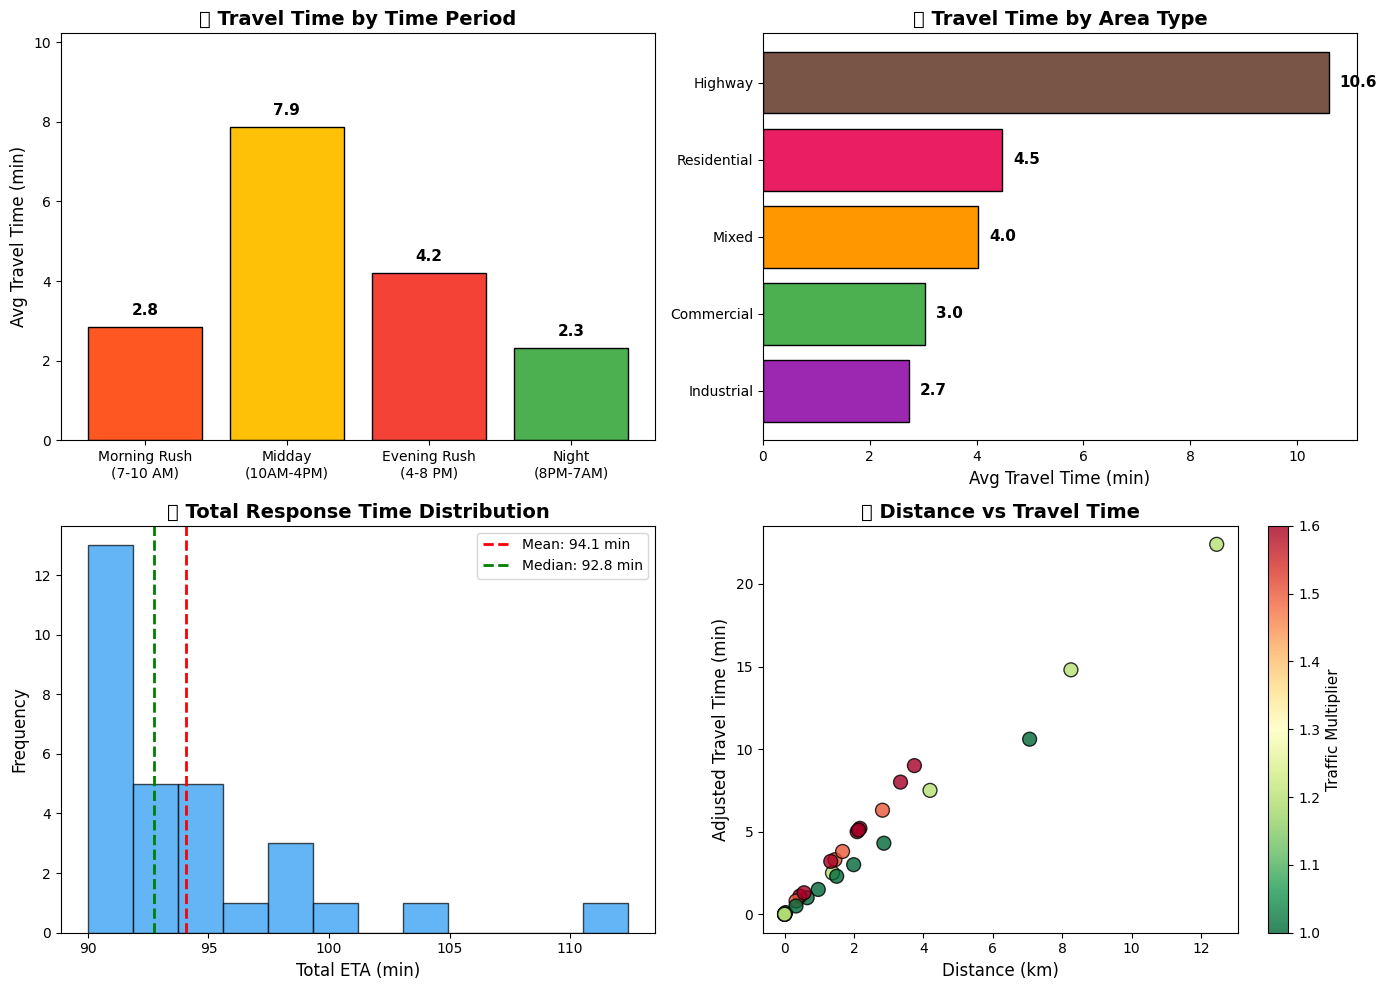

In [29]:
# Create Analysis Charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Travel Time by Time Period
ax1 = axes[0, 0]
time_order = ['morning_rush', 'midday', 'evening_rush', 'night']
time_labels = ['Morning Rush\n(7-10 AM)', 'Midday\n(10AM-4PM)', 'Evening Rush\n(4-8 PM)', 'Night\n(8PM-7AM)']
time_colors = ['#FF5722', '#FFC107', '#F44336', '#4CAF50']

time_data = response_times_df.groupby('time_period')['adjusted_travel_min'].mean().reindex(time_order)
bars1 = ax1.bar(time_labels, time_data.values, color=time_colors, edgecolor='black')
ax1.set_ylabel('Avg Travel Time (min)', fontsize=12)
ax1.set_title('🚗 Travel Time by Time Period', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(time_data.values) * 1.3)
for bar, val in zip(bars1, time_data.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{val:.1f}', ha='center', fontweight='bold', fontsize=11)

# 2. Travel Time by Area Type
ax2 = axes[0, 1]
area_colors = {'Residential': '#E91E63', 'Industrial': '#9C27B0', 
               'Commercial': '#4CAF50', 'Mixed': '#FF9800', 'Highway': '#795548'}
area_data = response_times_df.groupby('area_type')['adjusted_travel_min'].mean().sort_values()
bars2 = ax2.barh(area_data.index, area_data.values, 
                  color=[area_colors.get(a, '#2196F3') for a in area_data.index], edgecolor='black')
ax2.set_xlabel('Avg Travel Time (min)', fontsize=12)
ax2.set_title('🏢 Travel Time by Area Type', fontsize=14, fontweight='bold')
for bar, val in zip(bars2, area_data.values):
    ax2.text(val + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{val:.1f}', va='center', fontweight='bold', fontsize=11)

# 3. Total ETA Distribution
ax3 = axes[1, 0]
ax3.hist(response_times_df['total_eta_min'], bins=12, color='#2196F3', 
         edgecolor='black', alpha=0.7)
ax3.axvline(response_times_df['total_eta_min'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {response_times_df['total_eta_min'].mean():.1f} min")
ax3.axvline(response_times_df['total_eta_min'].median(), color='green', 
            linestyle='--', linewidth=2, label=f"Median: {response_times_df['total_eta_min'].median():.1f} min")
ax3.set_xlabel('Total ETA (min)', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('📊 Total Response Time Distribution', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)

# 4. Distance vs Travel Time
ax4 = axes[1, 1]
scatter = ax4.scatter(response_times_df['distance_km'], response_times_df['adjusted_travel_min'], 
                      c=response_times_df['traffic_multiplier'], cmap='RdYlGn_r', 
                      s=100, edgecolors='black', alpha=0.8)
ax4.set_xlabel('Distance (km)', fontsize=12)
ax4.set_ylabel('Adjusted Travel Time (min)', fontsize=12)
ax4.set_title('🗺️ Distance vs Travel Time', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Traffic Multiplier', fontsize=11)

plt.tight_layout()
plt.savefig('response_time_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("✅ Saved response_time_analysis.png")
plt.show()

---
## 📋 Final Summary

### Files Generated:
| File | Description |
|------|-------------|
| `centers_clean.csv` | 49 K-Electric centers (22 CFC + 27 CEC) |
| `sample_fault_locations.csv` | 30 test fault locations across Karachi |
| `fault_response_times.csv` | Calculated response times with traffic |
| `ke_coverage_map.html` | Interactive map with all markers |
| `ke_voronoi_coverage.html` | Voronoi coverage regions |
| `response_time_analysis.png` | Analysis visualizations |

### Key Insights:
- **Evening rush hour** (4-8 PM) has the highest traffic impact (1.6× multiplier)
- **Night time** has no traffic penalty (free flow)
- Average response includes ~90 min fix time + traffic-adjusted travel

### Traffic Multipliers Used:
| Time Period | Multiplier | Hours |
|------------|------------|-------|
| Night | 1.0× | 8 PM - 7 AM |
| Midday | 1.2× | 10 AM - 4 PM |
| Morning Rush | 1.5× | 7 AM - 10 AM |
| Evening Rush | 1.6× | 4 PM - 8 PM |

In [30]:
# List all generated files
import os

print("\n" + "="*60)
print("📁 FILES GENERATED")
print("="*60)

files = [
    'centers_clean.csv',
    'sample_fault_locations.csv', 
    'fault_response_times.csv',
    'ke_coverage_map.html',
    'ke_voronoi_coverage.html',
    'response_time_analysis.png'
]

for f in files:
    if os.path.exists(f):
        size = os.path.getsize(f) / 1024
        print(f"✅ {f:35s} ({size:.1f} KB)")
    else:
        print(f"❌ {f:35s} (not found)")

print("="*60)
print("\n🎉 Analysis complete! Open the HTML files in a browser to explore the maps.")


📁 FILES GENERATED
✅ centers_clean.csv                   (1.9 KB)
✅ sample_fault_locations.csv          (1.9 KB)
✅ fault_response_times.csv            (2.8 KB)
✅ ke_coverage_map.html                (108.0 KB)
✅ ke_voronoi_coverage.html            (131.3 KB)
✅ response_time_analysis.png          (157.5 KB)

🎉 Analysis complete! Open the HTML files in a browser to explore the maps.


---
## 8️⃣ Isochrone Maps (Drive-Time Zones)

**What are Isochrones?**
Unlike Voronoi (which uses straight-line distance), isochrones show areas reachable within a specific **drive time** from a center, considering actual road networks.

| Visualization | Based On | Shows |
|--------------|----------|-------|
| **Voronoi** | Straight-line distance | "Nearest center" regions (geometric) |
| **Isochrone** | Actual road network | "Reachable within X minutes" zones |

This is more realistic for dispatch planning!

In [35]:
# Isochrone API Function using OpenRouteService
import time

def get_isochrone_ors(lat, lng, time_minutes, api_key=ORS_API_KEY):
    """
    Get isochrone polygon from OpenRouteService
    
    Args:
        lat, lng: Center coordinates
        time_minutes: Drive time in minutes (e.g., 10, 20, 30)
        api_key: ORS API key
    
    Returns: List of [lat, lng] coordinates forming the polygon
    """
    url = "https://api.openrouteservice.org/v2/isochrones/driving-car"
    
    headers = {
        'Authorization': api_key,
        'Content-Type': 'application/json'
    }
    
    body = {
        "locations": [[lng, lat]],  # ORS uses [lng, lat] format
        "range": [time_minutes * 60],  # Convert to seconds
        "range_type": "time"
    }
    
    try:
        response = requests.post(url, json=body, headers=headers)
        
        if response.status_code == 200:
            data = response.json()
            if 'features' in data and len(data['features']) > 0:
                coords = data['features'][0]['geometry']['coordinates'][0]
                # Convert from [lng, lat] to [lat, lng] for Folium
                return [[c[1], c[0]] for c in coords]
            else:
                print(f"  ⚠️ No features in response")
        elif response.status_code == 401:
            print(f"  ❌ API Key invalid! Get a free key at: https://openrouteservice.org/dev/#/signup")
        elif response.status_code == 403:
            print(f"  ❌ API rate limit exceeded. Wait and try again.")
        else:
            print(f"  ❌ API error {response.status_code}: {response.text[:100]}")
            
    except Exception as e:
        print(f"  ❌ Request error: {e}")
    
    return None

# Test the API key first
print("🔑 Testing ORS API Key...")
test_result = get_isochrone_ors(24.8607, 67.0011, 10)
if test_result:
    print("✅ API Key is VALID! Isochrone function ready.")
else:
    print("\n⚠️ API Key test failed!")
    print("👉 Get a FREE API key at: https://openrouteservice.org/dev/#/signup")
    print("👉 Then update ORS_API_KEY in cell 2 above and re-run")

🔑 Testing ORS API Key...
✅ API Key is VALID! Isochrone function ready.


In [ ]:
# Create Isochrone Map for ALL 49 Centers
# Rate Limit: 20 requests/minute → Process 6 centers (18 calls), wait 60 seconds
# Features: Individual center toggles, markers on top, organized layer control

def create_isochrone_map(centers_df, time_ranges=[10, 20, 30], karachi_only=False, batch_size=6):
    """
    Create an isochrone map showing drive-time zones around K-Electric centers
    with toggleable layers for each center
    """
    # Filter centers based on karachi_only flag
    if karachi_only:
        working_centers = centers_df[centers_df['Latitude'] < 25.2].copy()
        print(f"📍 Using {len(working_centers)} Karachi-area centers (filtered from {len(centers_df)} total)")
    else:
        working_centers = centers_df.copy()
        print(f"📍 Using ALL {len(working_centers)} centers (CFCs + CECs across entire service area)")
    
    # Create map centered appropriately
    center_lat = working_centers['Latitude'].mean()
    center_lng = working_centers['Longitude'].mean()
    zoom = 8 if not karachi_only else 11
    
    m = folium.Map(location=[center_lat, center_lng], zoom_start=zoom, tiles='CartoDB positron')
    
    # Add alternative tile layers
    folium.TileLayer('OpenStreetMap', name='Street Map').add_to(m)
    folium.TileLayer('CartoDB dark_matter', name='Dark Mode').add_to(m)
    
    # Color scheme for different time ranges
    colors = {10: '#27ae60', 20: '#f39c12', 30: '#e74c3c'}
    opacity = {10: 0.4, 20: 0.3, 30: 0.2}
    
    total_calls = len(working_centers) * len(time_ranges)
    num_batches = (len(working_centers) + batch_size - 1) // batch_size
    
    print(f"⏳ Making {total_calls} API calls in {num_batches} batches")
    print(f"   Batch size: {batch_size} centers ({batch_size * len(time_ranges)} API calls)")
    print(f"   Estimated time: ~{num_batches} minutes (60s pause between batches)")
    print("-" * 60)
    
    successful = 0
    failed = 0
    
    # Store isochrone data for each center
    center_isochrones = {}
    
    # Create grouped FeatureGroups
    all_cfc_group = folium.FeatureGroup(name='📍 All CFC Isochrones', show=True)
    all_cec_group = folium.FeatureGroup(name='📍 All CEC Isochrones', show=True)
    
    # Individual center groups (for detailed view)
    individual_groups = {}
    
    for i, (idx, row) in enumerate(working_centers.iterrows()):
        center_name = row['Center_Name']
        lat, lng = row['Latitude'], row['Longitude']
        center_type = row['Center_Type']
        
        # Rate limiting pause
        if i > 0 and i % batch_size == 0:
            batch_num = i // batch_size
            print(f"\n⏸️  Rate limit pause: waiting 60 seconds... (Batch {batch_num}/{num_batches} complete)")
            print(f"   Progress: {successful} isochrones generated so far")
            time.sleep(60)
            print("▶️  Resuming...\n")
        
        print(f"[{i+1}/{len(working_centers)}] {center_name}...", end=" ")
        center_success = 0
        
        # Create individual feature group for this center (hidden by default)
        short_name = center_name.replace('CFC ', '').replace('CEC ', '')
        prefix = '🔵' if center_type == 'CFC' else '🟠'
        individual_groups[center_name] = folium.FeatureGroup(
            name=f'{prefix} {short_name}', 
            show=False  # Hidden by default - user can toggle
        )
        
        # Get isochrones in reverse order (largest first for layering)
        for time_min in sorted(time_ranges, reverse=True):
            polygon = get_isochrone_ors(lat, lng, time_min)
            
            if polygon:
                line_color = '#2980b9' if center_type == 'CFC' else '#d35400'
                
                poly = folium.Polygon(
                    locations=polygon,
                    color=line_color,
                    fill=True,
                    fillColor=colors[time_min],
                    fillOpacity=opacity[time_min],
                    weight=1,
                    popup=f"<b>{center_name}</b><br>{time_min} min drive zone"
                )
                
                # Add to main group (CFC or CEC)
                if center_type == 'CFC':
                    poly.add_to(all_cfc_group)
                else:
                    poly.add_to(all_cec_group)
                
                # Also add copy to individual group
                poly_copy = folium.Polygon(
                    locations=polygon,
                    color=line_color,
                    fill=True,
                    fillColor=colors[time_min],
                    fillOpacity=opacity[time_min] + 0.1,  # Slightly more visible when individual
                    weight=2,
                    popup=f"<b>{center_name}</b><br>{time_min} min drive zone"
                )
                poly_copy.add_to(individual_groups[center_name])
                
                successful += 1
                center_success += 1
            else:
                failed += 1
            
            time.sleep(0.5)
        
        print(f"✓ ({center_success}/{len(time_ranges)} zones)")
    
    # Add all isochrone groups to map FIRST (so markers appear on top)
    all_cfc_group.add_to(m)
    all_cec_group.add_to(m)
    
    # Add individual center groups (hidden by default)
    for group in individual_groups.values():
        group.add_to(m)
    
    # NOW add all center markers (they'll be on top of isochrones)
    cfc_markers = folium.FeatureGroup(name='⚡ CFC Centers (markers)', show=True)
    cec_markers = folium.FeatureGroup(name='🔧 CEC Centers (markers)', show=True)
    
    for _, row in working_centers.iterrows():
        marker_color = '#3498db' if row['Center_Type'] == 'CFC' else '#e67e22'
        marker_group = cfc_markers if row['Center_Type'] == 'CFC' else cec_markers
        
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=7,
            color='white',
            weight=2,
            fill=True,
            fillColor=marker_color,
            fillOpacity=1,
            popup=f"<b>{row['Center_Name']}</b><br>{row['Center_Type']}<br>{row['Division']}",
            tooltip=row['Center_Name']
        ).add_to(marker_group)
    
    cfc_markers.add_to(m)
    cec_markers.add_to(m)
    
    # Add legend
    legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; 
                background-color: white; padding: 15px; border-radius: 8px;
                border: 2px solid #333; font-family: Arial; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <h4 style="margin: 0 0 10px 0; border-bottom: 1px solid #ccc; padding-bottom: 5px;">🚗 Drive Time Zones</h4>
        <div style="margin: 5px 0;"><span style="background-color: #27ae60; padding: 3px 12px; margin-right: 8px; border-radius: 3px;">  </span> 10 minutes</div>
        <div style="margin: 5px 0;"><span style="background-color: #f39c12; padding: 3px 12px; margin-right: 8px; border-radius: 3px;">  </span> 20 minutes</div>
        <div style="margin: 5px 0;"><span style="background-color: #e74c3c; padding: 3px 12px; margin-right: 8px; border-radius: 3px;">  </span> 30 minutes</div>
        <hr style="margin: 10px 0;">
        <div style="margin: 5px 0;"><span style="background-color: #3498db; padding: 3px 12px; margin-right: 8px; border-radius: 50%;">  </span> CFC Center</div>
        <div style="margin: 5px 0;"><span style="background-color: #e67e22; padding: 3px 12px; margin-right: 8px; border-radius: 50%;">  </span> CEC Center</div>
        <hr style="margin: 10px 0;">
        <small style="color: #666;">💡 Use layer control (top-right)<br>to view individual centers</small>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    # Add layer control with collapsed=False for easier access
    folium.LayerControl(collapsed=False).add_to(m)
    
    # Add JavaScript to keep markers on top when layers are toggled
    marker_fix_js = '''
    <script>
        // Wait for map to be ready
        document.addEventListener('DOMContentLoaded', function() {
            setTimeout(function() {
                // Find the map object (Folium uses a generated ID)
                var mapId = document.querySelector('.folium-map').id;
                var map = window[mapId];
                
                if (map) {
                    function bringMarkersToFront() {
                        setTimeout(function() {
                            map.eachLayer(function(layer) {
                                // Check if this is a marker layer group (has circleMarkers)
                                if (layer._layers) {
                                    var hasCircleMarkers = false;
                                    for (var id in layer._layers) {
                                        if (layer._layers[id]._radius !== undefined) {
                                            hasCircleMarkers = true;
                                            break;
                                        }
                                    }
                                    if (hasCircleMarkers) {
                                        layer.bringToFront();
                                    }
                                }
                            });
                        }, 50);
                    }
                    
                    // Bring markers to front on layer changes
                    map.on('overlayadd', bringMarkersToFront);
                    map.on('layeradd', bringMarkersToFront);
                    
                    // Initial call
                    bringMarkersToFront();
                }
            }, 500);
        });
    </script>
    '''
    m.get_root().html.add_child(folium.Element(marker_fix_js))
    
    print("\n" + "="*60)
    print(f"✅ Generated {successful} isochrone polygons")
    print(f"❌ Failed: {failed} (API errors - likely no road data)")
    print("="*60)
    print("\n💡 TIP: Use the layer control (top-right) to:")
    print("   • Toggle 'All CFC/CEC Isochrones' OFF")
    print("   • Then enable individual centers (🔵/🟠) to view them clearly")
    
    return m

# Generate the isochrone map for ALL 49 K-Electric Centers
print("🗺️ Creating Isochrone Map for ALL 49 K-Electric Centers")
print("="*60)
isochrone_map = create_isochrone_map(centers_df, time_ranges=[10, 20, 30], karachi_only=False, batch_size=6)

# Save map
isochrone_map.save('ke_isochrone_map.html')
print(f"\n💾 Saved: ke_isochrone_map.html")

# Display inline
isochrone_map

🗺️ Creating Isochrone Map for ALL 49 K-Electric Centers
📍 Using ALL 49 centers (CFCs + CECs across entire service area)
⏳ Making 147 API calls in 9 batches
   Batch size: 6 centers (18 API calls)
   Estimated time: ~9 minutes (60s pause between batches)
------------------------------------------------------------
[1/49] CFC Manghopir... ✓ (3/3 zones)
[2/49] CFC Macher Colony... ✓ (3/3 zones)
[3/49] CFC Lines Area... ✓ (3/3 zones)
[4/49] CFC Lalabad... ✓ (3/3 zones)
[5/49] CFC Baldia... ✓ (3/3 zones)
[6/49] CFC North Karachi... ✓ (3/3 zones)

⏸️  Rate limit pause: waiting 60 seconds... (Batch 1/9 complete)
   Progress: 18 isochrones generated so far
▶️  Resuming...

[7/49] CFC Surjani... ✓ (3/3 zones)
[8/49] CFC Orangi... ✓ (3/3 zones)
[9/49] CFC SITE... ✓ (3/3 zones)
[10/49] CFC Liaquatabad... ✓ (3/3 zones)
[11/49] CFC North Nazimabad... ✓ (3/3 zones)
[12/49] CFC Gulshan... ✓ (3/3 zones)

⏸️  Rate limit pause: waiting 60 seconds... (Batch 2/9 complete)
   Progress: 36 isochrones genera

### 📊 Voronoi vs Isochrone: Key Differences

| Aspect | Voronoi Diagram | Isochrone Map |
|--------|----------------|---------------|
| **Basis** | Geometric straight-line distance | Actual road network drive time |
| **Shape** | Polygons with straight edges | Organic shapes following roads |
| **Accuracy** | Approximation only | Realistic coverage zones |
| **Considers** | Only location coordinates | Roads, speed limits, one-ways |
| **Use Case** | Quick theoretical coverage | Practical service planning |

**Why both matter:**
- **Voronoi** = "In a perfect world with straight roads, which center is closest?"  
- **Isochrone** = "In reality, where can this center reach within X minutes?"

The isochrone map reveals **actual service gaps** that Voronoi cannot show - areas where road networks make travel slower than distance suggests.